#Importing necessary libraries & Basic EDA
Here, We will see to import libraries which are required for data analysis, data processing and data visualization. Libraries like numpy, pandas, matplotlib and seaborn. warnings is for ignoring the warnings.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading training and test set as Pandas DataFrame
train_data= pd.read_csv('/content/drive/MyDrive/Data Science Practice /BBI_DataScience_Recrtmnt/SpendData.csv')
test_data= pd.read_csv('/content/drive/MyDrive/Data Science Practice /BBI_DataScience_Recrtmnt/TestData.csv')

In [3]:
#Displaying first 5 rows of training and test set
display(train_data.head())

test_data.head()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,b.8,b.9,b.10,b.11,b.12,b.13,b.14,b.15,b.16,b.17,b.18,b.19,b.20,b.21,b.22,pov6,b.23,b.24,b.25,b.26,b.27,b.28,c.29,c.30,var7,c.31,c.32,c.33,...,c.246,c.247,c.248,c.249,c.250,c.251,c.252,c.253,c.254,c.255,c.256,c.257,c.258,c.259,c.260,c.261,c.262,c.263,c.264,c.265,c.266,c.267,c.268,c.269,c.270,c.271,c.272,c.273,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,1,2.0,NaN,1,5,1,57,34,1,NaN,1,1.0,2,NaN,NaN,2,NaN,NaN,6,6,6.0,6.0,7,0.0,0.0,14,1,0,0,0,0,0,0,1,1,1,1.0,1,1,...,1,0,0,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,5.0,NaN
1,2,1,2.0,NaN,1,4,1,57,34,2,3.0,1,1.0,2,NaN,NaN,2,NaN,NaN,50,50,50.0,50.0,12,0.0,0.0,31,1,14,0,0,0,0,0,2,2,2,NaN,2,0,...,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,NaN
2,3,1,2.0,NaN,1,5,1,57,42,2,1.0,1,1.0,1,93.0,1.0,1,93.0,60.0,6,6,6.0,6.0,7,0.0,0.0,45,1,31,0,0,0,0,0,2,2,3,NaN,2,0,...,0,0,0,1,500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,NaN
3,4,1,2.0,NaN,1,6,1,57,34,2,4.0,1,1.0,2,NaN,NaN,2,NaN,NaN,7,7,7.0,7.0,8,0.0,0.0,14,1,31,0,0,0,0,0,2,2,2,NaN,2,0,...,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,5.0,NaN
4,5,1,2.0,NaN,1,8,1,22,1,1,NaN,1,2.0,1,102.0,0.0,1,93.0,3.0,2,2,2.0,2.0,3,0.0,0.0,32,2,0,0,0,0,0,0,2,2,2,NaN,2,1,...,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,NaN


,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,b.8,b.9,b.10,b.11,b.12,b.13,b.14,b.15,b.16,b.17,b.18,b.19,b.20,b.21,b.22,pov6,b.23,b.24,b.25,b.26,b.27,b.28,c.29,c.30,var7,c.31,c.32,c.33,...,c.245,c.246,c.247,c.248,c.249,c.250,c.251,c.252,c.253,c.254,c.255,c.256,c.257,c.258,c.259,c.260,c.261,c.262,c.263,c.264,c.265,c.266,c.267,c.268,c.269,c.270,c.271,c.272,c.273,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
0,9,1,1.0,NaN,1,11,1,47,8,2,1.0,1,1.0,1,211.0,0.0,1,211.0,NaN,12,12,12.0,12.0,10,0.0,0.0,31,NaN,14,0,0,0,0,0,2,2,2,NaN,2,0,...,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3.0
1,15,1,2.0,NaN,1,11,1,65,27,1,NaN,1,1.0,2,NaN,NaN,2,NaN,NaN,4,4,4.0,4.0,5,0.0,0.0,14,NaN,0,0,0,0,0,0,1,1,1,1.0,1,1,...,0,1,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0
2,16,1,2.0,NaN,1,6,1,65,27,2,1.0,1,1.0,2,NaN,NaN,2,NaN,NaN,56,56,56.0,56.0,12,0.0,0.0,45,NaN,0,0,0,0,0,0,2,2,3,NaN,2,0,...,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.0
3,24,1,1.0,NaN,1,3,1,3,2,1,NaN,1,1.0,1,35.0,3.0,1,90.0,NaN,5,5,5.0,5.0,6,0.0,0.0,14,NaN,0,0,0,0,0,0,2,2,2,NaN,2,0,...,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,32,1,1.0,NaN,1,5,1,83,3,1,NaN,1,4.0,1,94.0,5.0,1,200.0,4.0,4,4,4.0,4.0,5,0.0,0.0,14,NaN,0,0,0,0,0,0,2,2,2,NaN,2,0,...,1,1,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,NaN


In [4]:
#Finding out datatypes of the columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Columns: 301 entries, Unnamed: 0 to t.158
dtypes: float64(134), int64(165), object(2)
memory usage: 42.2+ MB


In [5]:
#Doing statistical Analysis on training data
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18379.0,11501.723326,6645.173397,1.0,5729.5,11514.0,17293.5,22974.0
month,18379.0,6.504054,3.468736,1.0,4.0,7.0,9.0,12.0
var8,14370.0,1.967780,0.845175,1.0,1.0,2.0,3.0,3.0
var6,1899.0,2.380200,0.812020,1.0,2.0,2.0,3.0,4.0
a.1,18379.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
c.281,18379.0,0.038359,0.192067,0.0,0.0,0.0,0.0,1.0
c.282,18379.0,0.070352,0.255746,0.0,0.0,0.0,0.0,1.0
c.283,18379.0,0.017683,0.131801,0.0,0.0,0.0,0.0,1.0
f.284,13961.0,3.038536,1.247728,1.0,2.0,3.0,4.0,5.0


In [6]:
#Checking the shape of both train_data and test_data 
#to make sure they have they have same columns

print(train_data.shape)
test_data.shape

(18379, 301)


(4595, 300)

In [7]:
#Since, both datasets don't have same number of columns
# Finding out that extra column in train_set

train_cols = list(train_data.columns)
test_cols = list(test_data.columns)

print(set(train_cols).difference(set(test_cols)))

{'t.158'}


# Preparing our datasets
Here, What we will do is prepare our data to feed it into an ML model. Since, there are many columns in the dataset that mainly contains null values, We'll identify and drop those columns. And, We'll also make sure that train_data and test_data has reasonable number of columns. 

In [8]:
#Checking the missing values in the columns in both train_data and test_data

#Checking this column to find out null values in it 
display(train_data['t.158'].isnull().sum()) 
display(test_data['pov6'].isnull().sum())    

display(train_data['var6'].isnull().sum())
display(test_data['var6'].isnull().sum())

18379

4595

16480

4113

In [9]:
#Since, there are many columns with null values
#Finding out all the columns that contains more than ~50% null values in both train_data and test_data

train_drop= []
test_drop= []
for cols in test_cols:
  if (train_data[cols].isnull().sum() > 10000):
    train_drop.append(cols)
  elif (test_data[cols].isnull().sum() > 2000):
    test_drop.append(cols)

#Displaying the columns that mainly contain null values of both train_data and test_data
display(train_drop)
test_drop

['var6',
 'b.10',
 'b.11',
 'b.13',
 'b.14',
 'b.20',
 'b.21',
 'c.31',
 'c.36',
 'c.37',
 'c.61',
 'c.67',
 'f.105',
 'f.106',
 'f.107',
 'f.108',
 'f.109',
 'f.110',
 'f.111',
 'f.112',
 'f.113',
 'f.114',
 'f.115',
 'f.116',
 'f.117',
 'f.118',
 'f.119',
 'f.120',
 'f.121',
 'f.122',
 'f.123',
 'a.184',
 'a.185',
 'b.195',
 'c.215',
 'c.216',
 'c.217',
 'c.218',
 'c.219',
 'c.220',
 'c.221',
 'c.222',
 'c.223']

['pov6', 'c.60', 'totshopping.rep']

In [10]:
#Preparing the list of columns to drop from both train_data and test_data
#Since they mainly contain null values and unnecessary data.

test_drop.extend(train_drop)
test_drop.append('Unnamed: 0')
train_drop.extend(['Unnamed: 0', 'c.60', 'totshopping.rep', 't.158'])

In [11]:
#Dropping all the listed columns
train_data.drop(columns= train_drop, axis=1, inplace=True)
test_data.drop(columns= test_drop, axis=1, inplace=True)

#Checking the shape of train_data and test_data
print(train_data.shape)
test_data.shape

(18379, 254)


(4595, 253)

In [12]:
#Confirming that the only extra column in train_data is the target column(i.e. Label)
train_cols_2 = list(train_data.columns)
test_cols_2 = list(test_data.columns)

print(set(train_cols_2).difference(set(test_cols_2)))

{'pov6'}


# Setting up our data and ML Model using pycaret.

In [13]:
#Installing pycaret
!pip install pycaret

     |████████████████████████████████| 256kB 5.7MB/s 
     |████████████████████████████████| 13.9MB 298kB/s 
     |████████████████████████████████| 6.8MB 43.9MB/s 
     |████████████████████████████████| 157.5MB 89kB/s 
     |████████████████████████████████| 266kB 51.3MB/s 
     |████████████████████████████████| 174kB 39.1MB/s 
     |████████████████████████████████| 66.3MB 70kB/s 
     |████████████████████████████████| 276kB 48.4MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 1.6MB 42.9MB/s 
     |████████████████████████████████| 1.8MB 43.8MB/s 
     |████████████████████████████████| 1.1MB 42.0MB/s 
     |████████████████████████████████| 163kB 45.9MB/s 
     |████████████████████████████████| 153kB 24.2MB/s 
     |████████████████████████████████| 337kB 43.0MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 604kB 41.3MB/

In [14]:
# Importing necessary modules from pycaret.classification
from pycaret.classification import setup, compare_models, create_model, tune_model, predict_model, plot_model, evaluate_model

# Setting up the classifier in which numerical and categorical data will be imputed separately 
#(i.e. categorical_values => most_frequent, numeric=> mean), target variable will be label encoded,
# categorical values will be one-hot encoded, important features will be selected and 
# dataset will be splitted into training set and validation set which will be done stratifically.

clf1= setup(train_data, target='pov6', session_id= 123, feature_selection= True, data_split_stratify= True, categorical_imputation= 'mode')

,Description,Value
0,session_id,123
1,Target,pov6
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5"
4,Original Data,"(18379, 254)"
5,Missing Values,True
6,Numeric Features,93
7,Categorical Features,160
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
#Finding out the top classification models which makes best predictions sorted according to AUC score using 10 fold cross validation.

# I chose AUC represents degree or measure of separability. It tells how much our model is capable of distinguishing between classes.

top_5= compare_models(n_select= 5, exclude=['xgboost', 'catboost', 'gbc', 'svm', 'et', 'ada', 'lda'], sort= 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9642,0.9925,0.8105,0.9637,0.9633,0.9018,0.9021,3.652
rf,Random Forest Classifier,0.9515,0.9881,0.6555,0.9512,0.9472,0.8633,0.8651,2.649
dt,Decision Tree Classifier,0.9401,0.9258,0.8023,0.9410,0.9404,0.8393,0.8393,0.636
knn,K Neighbors Classifier,0.7771,0.6890,0.2606,0.7220,0.7335,0.2104,0.2405,1.172
qda,Quadratic Discriminant Analysis,0.4241,0.6130,0.2688,0.7414,0.4365,0.1212,0.1865,0.792
nb,Naive Bayes,0.7731,0.6107,0.1738,0.6118,0.6751,0.0068,0.0507,0.113
lr,Logistic Regression,0.7725,0.4845,0.1667,0.5967,0.6733,0.0000,0.0000,1.317
ridge,Ridge Classifier,0.6532,0.0000,0.2423,0.7267,0.6702,0.2132,0.2233,0.432


As we can clearly see some reasons to choose light Gradient Boosting Machine(lightgbm) as our classifier since it gives highest AUC score but also comes at a cost of time. It takes more time to compile, so maybe a Decision Tree Classifer will be more time efficient and Random Forest classifier after that.
But I'm focusing on the AUC score ,taking a risk of this trade off here and choosing "lightgbm".

In [16]:
#Creating a lightgbm model and evaluating it using 5 fold Cross validation and we can see the scores.
model= create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9615,0.9898,0.7817,0.9604,0.9603,0.8934,0.8941
1,0.9623,0.9925,0.8229,0.9619,0.9617,0.8965,0.8968
2,0.9623,0.9925,0.7948,0.9621,0.9614,0.8960,0.8965
3,0.9615,0.9917,0.8043,0.9609,0.9607,0.8951,0.8953
4,0.9693,0.9940,0.8355,0.9691,0.9687,0.9161,0.9163
Mean,0.9634,0.9921,0.8078,0.9629,0.9625,0.8994,0.8998
SD,0.0030,0.0013,0.0193,0.0032,0.0031,0.0084,0.0083


In [17]:
#Hyperparameter tuning of the model and displaying the scores after tuning.
tuned_model= tune_model(model, fold= 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9650,0.9893,0.8066,0.9646,0.9640,0.9038,0.9041
1,0.9662,0.9919,0.8446,0.9660,0.9657,0.9078,0.9079
2,0.9642,0.9935,0.8185,0.9640,0.9637,0.9019,0.9022
3,0.9650,0.9929,0.8296,0.9643,0.9643,0.9046,0.9048
4,0.9693,0.9958,0.8405,0.9689,0.9687,0.9161,0.9163
Mean,0.9660,0.9927,0.8280,0.9655,0.9653,0.9068,0.9071
SD,0.0018,0.0021,0.0140,0.0018,0.0019,0.0050,0.0050


In [18]:
#Checking out tuned model and it's hyperparameters.
tuned_model

LGBMClassifier(bagging_fraction=1.0, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.256, max_depth=-1,
               min_child_samples=70, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=240, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=0.7, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [19]:
#Preicting on holdout/ validation set which was splitted into train and test set in setup process.
#And displaying our model's performance in terms of scores on that holdout data.
pred_holdouts= predict_model(tuned_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9646,0.9933,0.8413,0.9646,0.9643,0.9041,0.9042


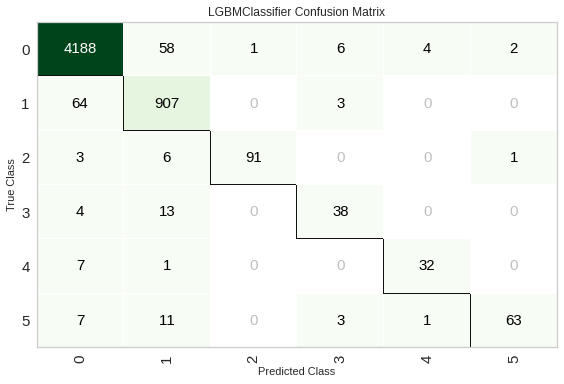

In [20]:
#Displaying the confusion matrix on the holdout/ validation set.
#Remember the  classes are label encoded such as 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5
plot_model(tuned_model, plot='confusion_matrix')

In [21]:
#Predicting on our test data in which the groups were missing
predicted_groups= predict_model(tuned_model, data= test_data)
predicted_groups.head()

,month,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,b.8,b.9,b.12,b.15,b.16,b.17,b.18,b.19,b.22,b.23,b.24,b.25,b.26,b.27,b.28,c.29,c.30,var7,c.32,c.33,c.34,c.35,c.38,c.39,c.40,c.41,c.42,c.43,c.44,c.45,...,c.247,c.248,c.249,c.250,c.251,c.252,c.253,c.254,c.255,c.256,c.257,c.258,c.259,c.260,c.261,c.262,c.263,c.264,c.265,c.266,c.267,c.268,c.269,c.270,c.271,c.272,c.273,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,Label,Score
0,1,1.0,1,11,1,47,8,2,1.0,1,1.0,1,1,12,12,12.0,12.0,10,31,14,0,0,0,0,0,2,2,2,2,0,0,0,2,NaN,0.0,0.0,0,0.0,0,0.0,...,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3.0,1,0.9988
1,1,2.0,1,11,1,65,27,1,NaN,1,1.0,2,2,4,4,4.0,4.0,5,14,0,0,0,0,0,0,1,1,1,1,1,0,0,2,583.58,0.0,0.0,0,0.0,0,0.0,...,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,3.0,1,0.9565
2,1,2.0,1,6,1,65,27,2,1.0,1,1.0,2,2,56,56,56.0,56.0,12,45,0,0,0,0,0,0,2,2,3,2,0,0,0,2,NaN,0.0,0.0,0,0.0,0,0.0,...,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.0,4,0.5925
3,1,1.0,1,3,1,3,2,1,NaN,1,1.0,1,1,5,5,5.0,5.0,6,14,0,0,0,0,0,0,2,2,2,2,0,0,0,2,2274.10,0.0,0.0,0,0.0,0,0.0,...,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,0.9990
4,1,1.0,1,5,1,83,3,1,NaN,1,4.0,1,1,4,4,4.0,4.0,5,14,0,0,0,0,0,0,2,2,2,2,0,0,0,2,786.63,0.0,0.0,0,0.0,0,0.0,...,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,NaN,1,0.9994


In [23]:
predicted_groups['Label'].value_counts()

1    3558
2     826
3      82
6      60
4      39
5      30
Name: Label, dtype: int64

In [25]:
predictions= predicted_groups['Label']
predictions.to_csv('prediction.csv', index= False)